This is a notebook to create summary dataframe information for plotting figure2. for figure2 which contains four sub figure so here I first construct a summary dataframe from the sum_df of each flowcell for the passed and reads hit specific genomes, then I added one column to each summary df to note down the flowcellID for later on sub figure. then I put everything again into yiheng@gduserv.anu.edu.au:~/analysis/WGS/.

In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import argparse

In [9]:
#parser = argparse.ArgumentParser(description='This is a script to get information for figure two. It require to have a sum_df_DATE_FLOWCELLID.tab file in the analysis folder of folder of each run.')
#parser.add_argument("BASEDIR", help="base folder, supposed to have all the sub folders processed by WGS script. The same as Indir in YH_script2. remenber DO NOT put the backslash '/' at the end!")
#args = parser.parse_args()

In [10]:
# use argparse to do this
#BASEDIR = args.BASEDIR
BASEDIR = '/home/yiheng/data/20170617_FAH05731'

# here we define the folder name of the dataframe it created by capturing the folder from the BASDIR
folder_name = os.path.basename(BASEDIR)

In [11]:
# first check if the analysis folder is there
folder_list = 'analysis  basecalled_data  scripts  tracking  workspace'.split(' ')
for x in range(0,folder_list.count('')):
    folder_list.remove('')
#fix this test
if not set(os.listdir(os.path.abspath(BASEDIR))) == set (folder_list):
    print("Something wrong with basefolder. check it please.")

In [12]:
# get the dataframe there
dataframe = os.path.join(BASEDIR, 'analysis', 'summary_df_%s.tab' % folder_name)
sum_df = pd.read_csv(dataframe, sep='\t')

In [13]:
sum_df.columns

Index(['read_id', 'passes_filtering', 'sequence_length_template',
       'mean_qscore_template', 'barcode_arrangement', 'barcode_score', 'kit',
       'variant', 'pc_survived', 'nl_survived', 'qseqid_rg', 'sseqid_rg',
       'evalue_rg', 'length_rg', 'pident_rg', 'nident_rg', 'sacc_rg',
       'staxids_rg', 'scomnames_rg', 'read_length_pc_x', 'qseqid_nt',
       'sseqid_nt', 'evalue_nt', 'length_nt', 'pident_nt', 'nident_nt',
       'sacc_nt', 'staxids_nt', 'scomnames_nt', 'read_length_pc_y'],
      dtype='object')

In [ ]:
# this step get rid of all wheat reads
sum_df.sseqid_rg.fillna(False, inplace=True)
rgblasthit_reads = sum_df[(sum_df.sseqid_rg != False) & (sum_df.passes_filtering == True) & (sum_df.pc_survived == True) & (sum_df.nl_survived == True)]
pd.set_option('display.max_columns', None)

for x in rgblasthit_reads.sseqid_rg:
    if x.split('_')[0] == 'Wheat':
        rgblasthit_reads_nowheat = rgblasthit_reads[rgblasthit_reads.sseqid_rg != x]


In [ ]:
rgblasthit_reads_nowheat

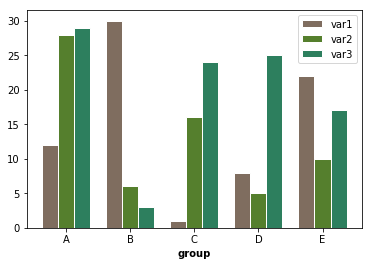

In [7]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()